## MPG Prediction

### 1. Setting up the dataset repository

In [1]:
!mkdir data

In [2]:
!unzip data/archive.zip -d data/

Archive:  data/archive.zip
  inflating: data/MetroPT3(AirCompressor).csv  


## 2. EDA

In [3]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/MetroPT3(AirCompressor).csv')
df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [5]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

In [ ]:
df.shape

(1516948, 17)

In [ ]:
df.describe()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,7.584735e+06,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
std,4.379053e+06,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01
min,0.000000e+00,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.792368e+06,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,7.584735e+06,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.137710e+07,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.516947e+07,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


**Plot the boxplot**

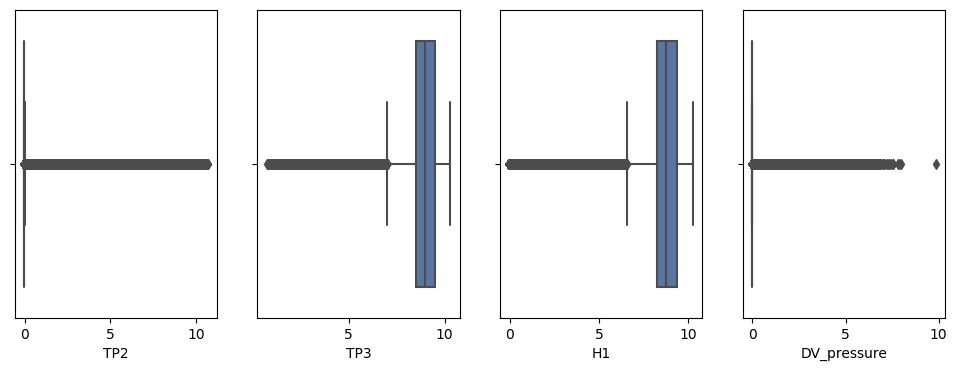

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
sns.set_theme(style="whitegrid")
for axid, col in enumerate(["TP2", "TP3", "H1","DV_pressure"]):
    sns.boxplot(x=df[col], ax=ax[axid])

**REMOVING OUTLIERS**

In [ ]:
Q1 = df['H1'].quantile(0.25)
Q3 = df['H1'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df['H1'] >= lower_bound) & (df['H1'] <= upper_bound)]
df.shape
df_filtered.shape

(1275621, 17)

**Is there a correlation between H1 and MPG ?**

---



<Axes: xlabel='H1', ylabel='MPG'>

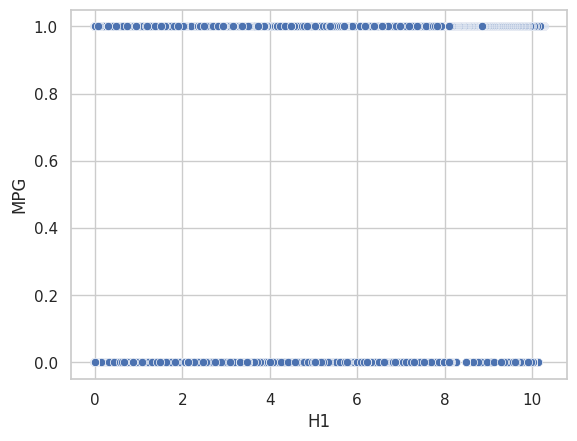

In [ ]:
sns.scatterplot(x=df["H1"], y=df["MPG"])
# TP2", "H1", "COMP", "Motor_current", "DV_eletric", "Towers", "MPG

**Null Values in the dataset?**

In [ ]:
df.isnull().sum()

Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

**What is the distribution of MPG in the dataset?**

In [ ]:
temp = df["MPG"].value_counts()
temp

1.0    1263108
0.0     253840
Name: MPG, dtype: int64

<Axes: ylabel='MPG'>

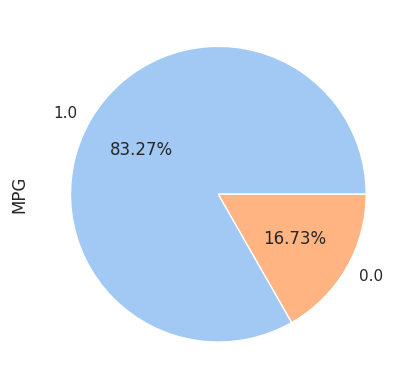

In [ ]:
piec_colors = sns.color_palette('pastel')[0:len(temp)]
temp.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

From the above plot we can infer that banglore is quite expensive. The semi furnished rooms there are more expensive than furnished rooms in Hyderabad or Mumbai.

## 3. Data Transformations

In [ ]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

In [12]:
from sklearn import preprocessing

## Let us now split the dataset into train-val-test sets.

In [ ]:
df.head(3)

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [6]:
data_df = df[["TP2", "H1", "COMP", "Motor_current", "DV_eletric", "Towers", "MPG"]]
data_df.head()

,TP2,H1,COMP,Motor_current,DV_eletric,Towers,MPG
0,-0.012,9.340,1.0,0.0400,0.0,1.0,1.0
1,-0.014,9.332,1.0,0.0400,0.0,1.0,1.0
2,-0.012,9.322,1.0,0.0425,0.0,1.0,1.0
3,-0.012,9.312,1.0,0.0400,0.0,1.0,1.0
4,-0.012,9.302,1.0,0.0400,0.0,1.0,1.0


<Axes: >

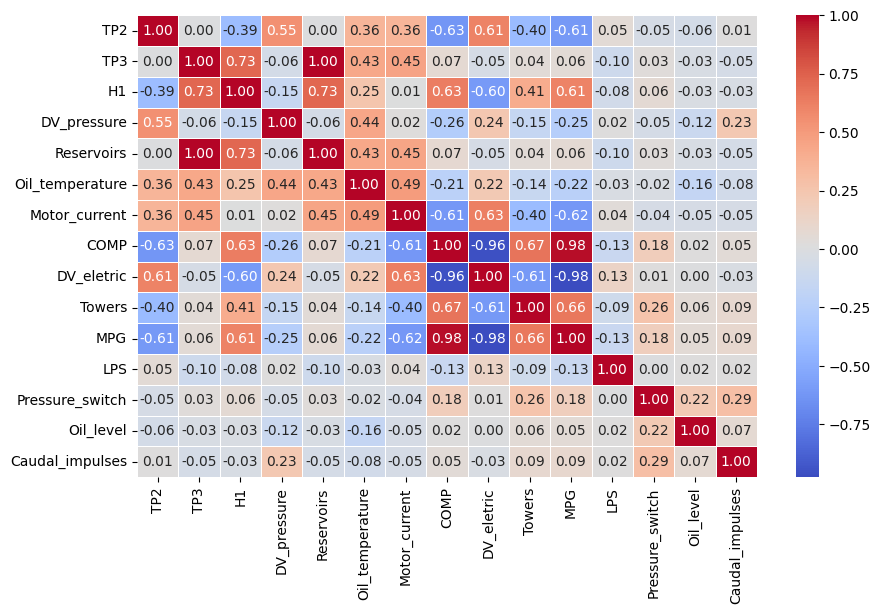

In [ ]:
new_df = df[["TP2", "TP3", "H1", "DV_pressure", "Reservoirs", "Oil_temperature", "Motor_current", "COMP", "DV_eletric", "Towers","MPG","LPS","Pressure_switch","Oil_level","Caudal_impulses"]]
# sns.heatmap(data=new_df.corr(), lw = 1, fmt='.2f', linewidth=0.4,annot_kws={"size": 10}, cmap='coolwarm',ax=ax)
corr_matrix = new_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4, annot_kws={"size": 10}, cmap='coolwarm',ax=ax)

**Data Normalization/Standardization**

In [7]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data_df, df["MPG"], random_state=42, test_size=0.20)

In [9]:
X_train

,TP2,H1,COMP,Motor_current,DV_eletric,Towers,MPG
65256,-0.008,8.862,1.0,0.0350,0.0,1.0,1.0
1409954,-0.010,9.162,1.0,0.0400,0.0,1.0,1.0
674985,-0.012,9.656,1.0,3.8200,0.0,1.0,1.0
160529,-0.012,8.848,1.0,0.0400,0.0,1.0,1.0
730739,5.792,-0.008,0.0,4.8600,1.0,1.0,0.0
...,...,...,...,...,...,...,...
259178,8.904,-0.016,0.0,5.7375,1.0,0.0,0.0
1414414,-0.010,9.616,1.0,3.8050,0.0,1.0,1.0
131932,-0.014,8.942,1.0,0.0375,0.0,1.0,1.0
671155,-0.016,8.740,1.0,0.0400,0.0,1.0,1.0


In [10]:
y_train

65256      1.0
1409954    1.0
674985     1.0
160529     1.0
730739     0.0
          ... 
259178     0.0
1414414    1.0
131932     1.0
671155     1.0
121958     1.0
Name: MPG, Length: 1213558, dtype: float64

In [13]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((1213558, 7), (303390, 7))

In [14]:
X_train_scaled

array([[-0.42318605,  0.38810895,  0.44137046, ..., -0.43731143,
         0.29532174,  0.44826301],
       [-0.42380123,  0.47811909,  0.44137046, ..., -0.43731143,
         0.29532174,  0.44826301],
       [-0.4244164 ,  0.6263358 ,  0.44137046, ..., -0.43731143,
         0.29532174,  0.44826301],
       ...,
       [-0.42503157,  0.41211165,  0.44137046, ..., -0.43731143,
         0.29532174,  0.44826301],
       [-0.42564674,  0.35150482,  0.44137046, ..., -0.43731143,
         0.29532174,  0.44826301],
       [-0.42564674,  0.69534358,  0.44137046, ..., -0.43731143,
         0.29532174,  0.44826301]])

In [15]:
X_test_scaled

array([[-0.4244164 ,  0.47031821,  0.44137046, ..., -0.43731143,
         0.29532174,  0.44826301],
       [-0.42564674,  0.68154203,  0.44137046, ..., -0.43731143,
         0.29532174,  0.44826301],
       [-0.42564674,  0.24529285,  0.44137046, ..., -0.43731143,
         0.29532174,  0.44826301],
       ...,
       [-0.4244164 ,  0.68094196,  0.44137046, ..., -0.43731143,
         0.29532174,  0.44826301],
       [-0.42503157,  0.26869548,  0.44137046, ..., -0.43731143,
         0.29532174,  0.44826301],
       [-0.42564674,  0.25069346,  0.44137046, ..., -0.43731143,
         0.29532174,  0.44826301]])

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [17]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 100)), 'learning_rate': [0.001, 0.01, 0.1]}}
}


In [18]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_model)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

LinearRegression 1.2974310442172487e-15 {}
RandomForestRegressor 0.0 {'max_depth': 1, 'n_estimators': 5}


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


XGBRegressor 8.072345989862184e-07 {'learning_rate': 0.1, 'n_estimators': 310}
Best model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=310, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


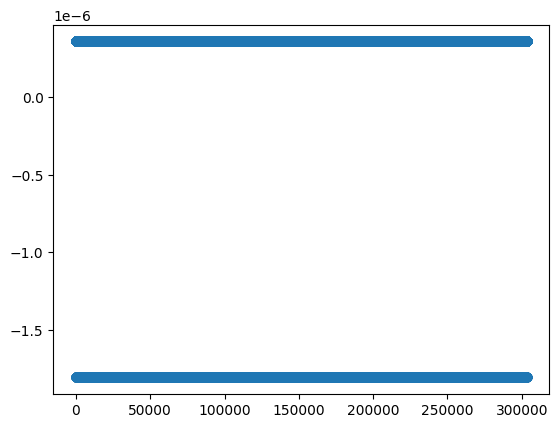

In [19]:
model_results = eval_models()

In [20]:
model_results

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,0.0,0.0,0.0,0.0,{}
RandomForestRegressor,0.0,0.0,0.0,0.0,"{'max_depth': 1, 'n_estimators': 5}"
XGBRegressor,0.000001,0.000001,0.000001,0.000001,"{'learning_rate': 0.1, 'n_estimators': 310}"
